FINAL YEAR CHRONIC KIDNEY DISEASE PROJECT

Import the libraries which are requied for the dataset cleaning

PANDAS = Pandas is the primary tool for data cleaning.ex:df.info(),df.describe(),df.head() etc.

NUMPY = Numpy is the foundation for numerical computing in python,ex:np.nan,isnull(),fillna() etc.

MATPLOTLIB =Matplotlib is a plotting libraries,helps with visually identifing problems.

SEABORN = Seaborn is used to create beautiful,informative,statistically sophisticated graphics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ckdd.csv(original dataset) is loaded in the dataset variable

In [2]:
dataset = pd.read_csv('chronic_kidney_disease.csv',on_bad_lines='skip')
dataset.head(3)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd


shape provides the tuple(number_of_rows, no_of_columns)

In [3]:
dataset.shape

(397, 25)

Quantifying missing data across your entire dataset in a single,readable command 

In [4]:
dataset.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

Heatmap used for visualizing correlation matrices.

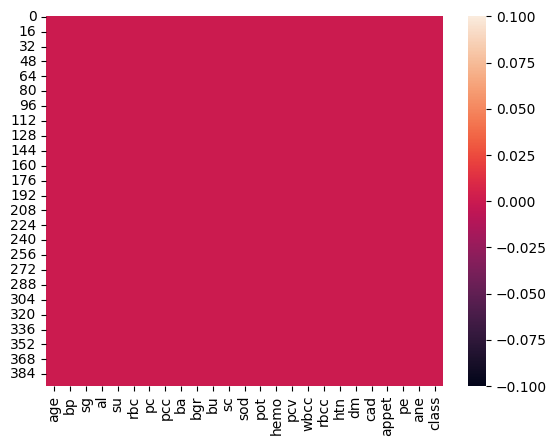

In [5]:
sns.heatmap(dataset.isnull())
plt.show()

In [6]:
print(dataset.shape)
print(dataset.columns.tolist())
print(dataset.dtypes)
print(dataset.isnull().sum())

(397, 25)
['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']
age      object
bp       object
sg       object
al       object
su       object
rbc      object
pc       object
pcc      object
ba       object
bgr      object
bu       object
sc       object
sod      object
pot      object
hemo     object
pcv      object
wbcc     object
rbcc     object
htn      object
dm       object
cad      object
appet    object
pe       object
ane      object
class    object
dtype: object
age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64


In [30]:
import pandas as pd
numerical_columns = [
    'age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot',
    'hemo', 'pcv', 'wbcc', 'rbcc'
]

for col in numerical_columns:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')
    dataset[col].fillna(dataset[col].median(), inplace=True)


categorical_columns = [
    'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
    'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class'
]

for col in categorical_columns:
    dataset[col] = dataset[col].astype(str).str.strip().str.lower()
    dataset[col].replace('?', pd.NA, inplace=True)
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)
    
columns_to_impute = ['sg', 'al', 'su', 'rbc', 'pc']
for col in columns_to_impute:
    dataset[col] = dataset[col].astype(str).str.strip().str.lower()
    dataset[col] = dataset[col].replace('<na>', pd.NA)
    mode_val = dataset[col].mode()[0]
    dataset[col].fillna(mode_val, inplace=True)


C:\Users\sagar shresti\AppData\Local\Temp\ipykernel_20496\1880263669.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(dataset[col].median(), inplace=True)
C:\Users\sagar shresti\AppData\Local\Temp\ipykernel_20496\1880263669.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [31]:
print(dataset.isna().sum())

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64


In [32]:
dataset.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1,0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4,0,normal,normal,notpresent,notpresent,121.0,...,38.0,6000.0,4.8,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2,3,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,4.8,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4,0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2,0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [33]:
dataset.to_csv("cleaned_ckd_dataset.csv", index=False)


In [34]:
from ctgan import CTGAN 

In [35]:
categorical_columns = [
    'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
    'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class'
]
ctgan = CTGAN(epochs=300)
ctgan.fit(dataset, categorical_columns)
synthetic_data = ctgan.sample(500)


In [36]:
int_columns = ['age', 'bp', 'al', 'su', 'pcv', 'wbcc', 'rbcc']

for col in int_columns:
    synthetic_data[col] = pd.to_numeric(synthetic_data[col], errors='coerce')  # Convert to float
    synthetic_data[col] = synthetic_data[col].round().astype('Int64')

float_columns = ['bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

for col in float_columns:
    synthetic_data[col] = synthetic_data[col].astype(float).round(1)

categorical_columns = [
    'sg', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm',
    'cad', 'appet', 'pe', 'ane', 'class'
]

for col in categorical_columns:
    synthetic_data[col] = synthetic_data[col].astype(str).str.strip().str.lower()


In [37]:
synthetic_data.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,70,69,1.005,0,3,abnormal,normal,notpresent,notpresent,153.5,...,45,5106,6,yes,yes,no,good,yes,no,ckd
1,37,89,1.020,0,0,normal,abnormal,notpresent,notpresent,367.5,...,24,7000,5,yes,no,yes,poor,no,no,notckd
2,61,70,1.015,2,0,abnormal,abnormal,notpresent,present,458.4,...,24,9771,6,yes,no,no,good,yes,no,ckd
3,17,71,1.015,0,5,normal,abnormal,notpresent,notpresent,426.1,...,41,8459,3,no,no,no,good,no,no,ckd
4,57,60,1.020,0,0,normal,normal,notpresent,notpresent,131.4,...,42,8563,6,yes,no,no,poor,no,no,ckd


In [38]:
synthetic_data.to_csv("synthetic_ckd_dataset.csv", index=False)

combining the datasets

In [39]:
cleaned_dataset = pd.read_csv("cleaned_ckd_dataset.csv")
synthetic_dataset = pd.read_csv("synthetic_ckd_dataset.csv")


In [40]:
print(cleaned_dataset.columns)
print(synthetic_data.columns)


Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')
Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')


In [41]:
combined_dataset = pd.concat([cleaned_dataset, synthetic_dataset], ignore_index=True)

In [42]:
combined_dataset.to_csv("combined_ckd_dataset.csv", index=False)

In [43]:
combined_dataset.shape

(897, 25)

In [44]:
combined_dataset.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1,0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4,0,normal,normal,notpresent,notpresent,121.0,...,38.0,6000.0,4.8,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2,3,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,4.8,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4,0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2,0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [45]:
print(combined_dataset['class'].unique())

['ckd' 'notckd']


In [46]:
final = pd.read_csv("combined_ckd_dataset.csv")
final.shape

(897, 25)

In [47]:
final['class_encoded'] = final['class'].map({'ckd': 1, 'notckd': 0})


In [25]:

import matplotlib.pyplot as plt
import seaborn as sns

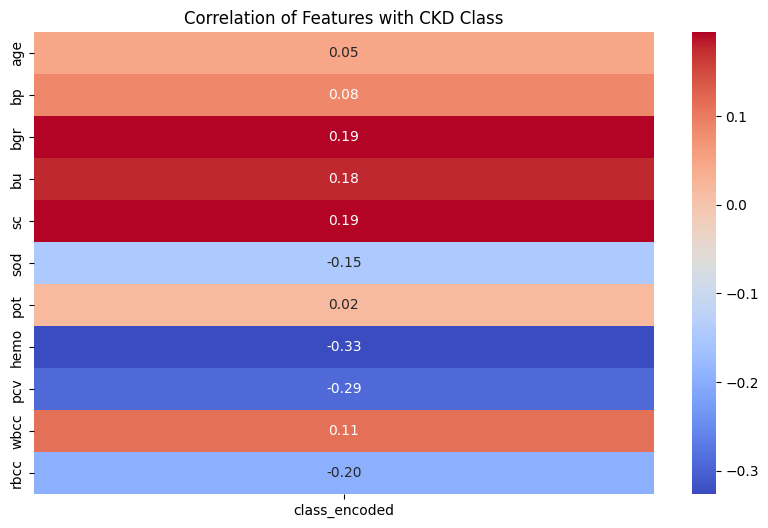

In [48]:
numerical_columns = [
    'age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot',
    'hemo', 'pcv', 'wbcc', 'rbcc'
]
correlations = final[numerical_columns + ['class_encoded']].corr()
target_corr = correlations['class_encoded'].drop('class_encoded')
plt.figure(figsize=(10, 6))
sns.heatmap(target_corr.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of Features with CKD Class")
plt.show()


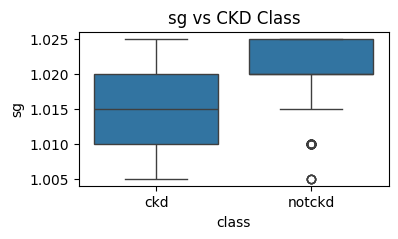

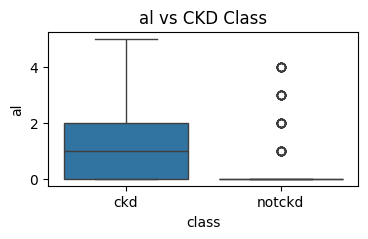

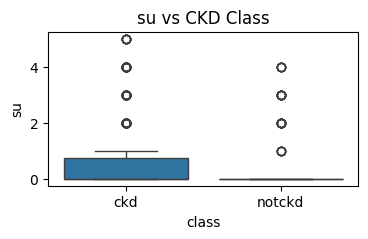

In [49]:
ordinal_columns = ['sg', 'al', 'su']
for col in ordinal_columns:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x='class', y=col, data=final)
    plt.title(f"{col} vs CKD Class")
    plt.show()


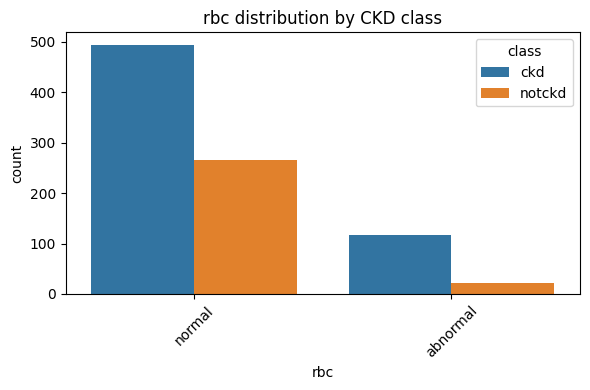

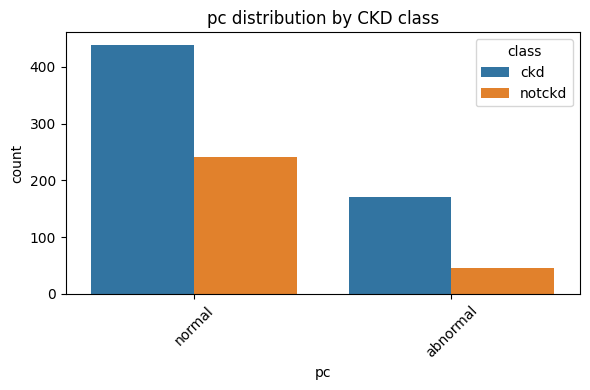

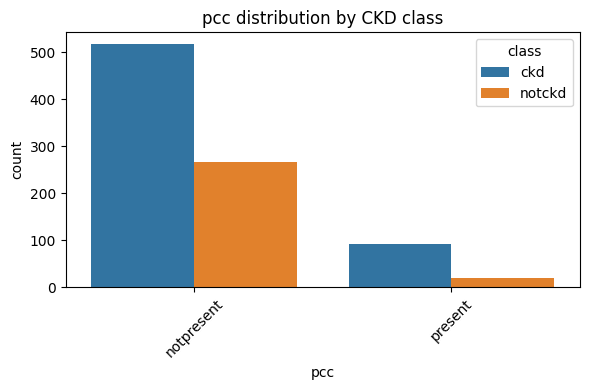

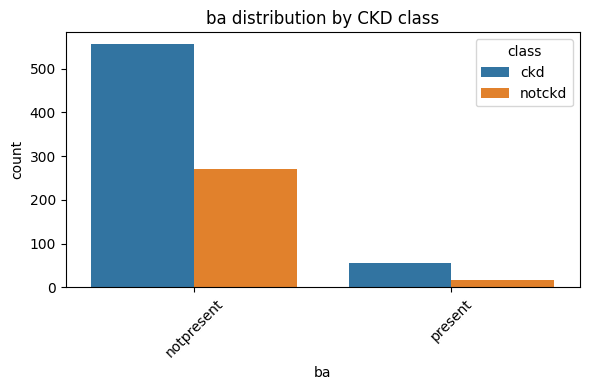

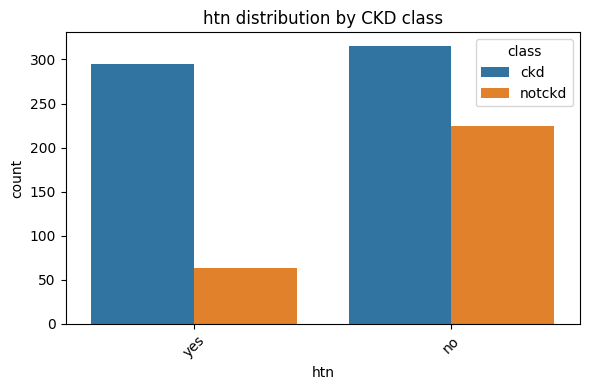

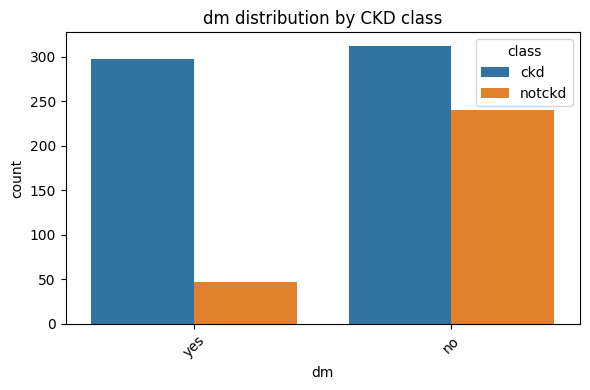

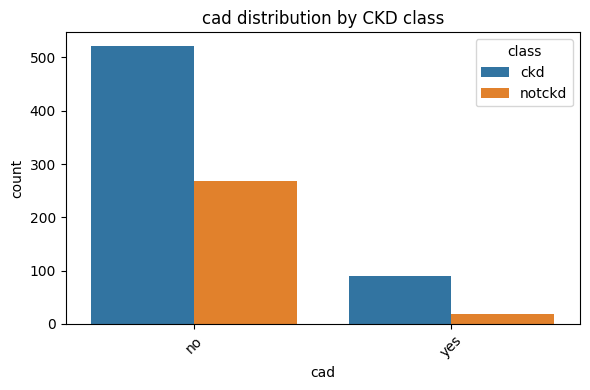

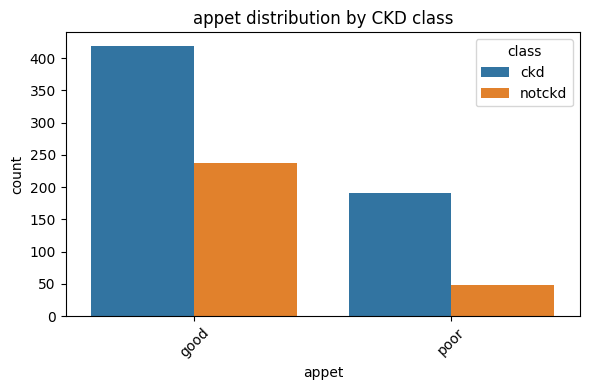

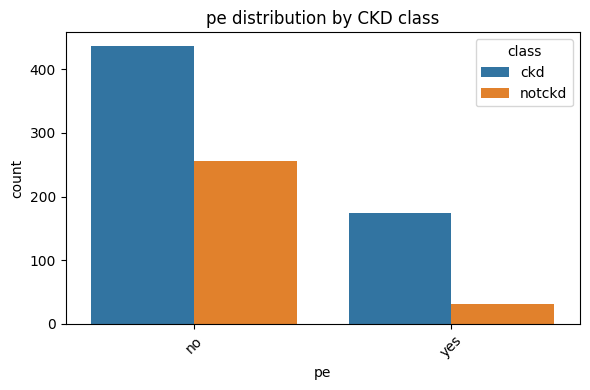

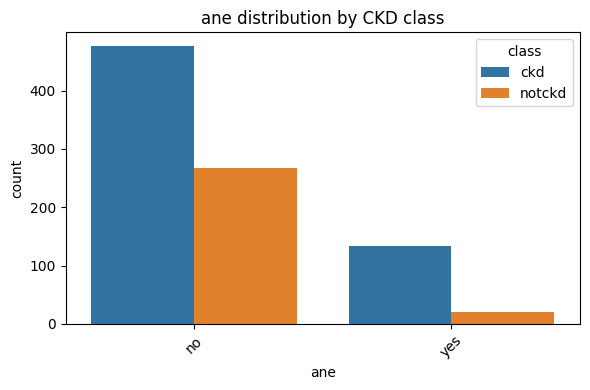

In [50]:
categorical_columns = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='class', data=final)
    plt.title(f"{col} distribution by CKD class")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [57]:
selected_features = ['sc', 'hemo', 'al', 'sg', 'pcv', 'rbcc', 'dm', 'htn']
dataset_reduced = final[selected_features + ['class']]

In [72]:
print(dataset_reduced['dm'].unique())
print(dataset_reduced['htn'].unique())

[nan]
[nan]


In [73]:
dataset_reduced['dm'] = dataset_reduced['dm'].replace(['?', '', ' ', np.nan], np.nan)
dataset_reduced['htn'] = dataset_reduced['htn'].replace(['?', '', ' ', np.nan], np.nan)


C:\Users\sagar shresti\AppData\Local\Temp\ipykernel_20496\1170978916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_reduced['dm'] = dataset_reduced['dm'].replace(['?', '', ' ', np.nan], np.nan)
C:\Users\sagar shresti\AppData\Local\Temp\ipykernel_20496\1170978916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_reduced['htn'] = dataset_reduced['htn'].replace(['?', '', ' ', np.nan], np.nan)


In [74]:
dataset_reduced['dm'] = dataset_reduced['dm'].map({'yes': 1, 'no': 0})
dataset_reduced['htn'] = dataset_reduced['htn'].map({'yes': 1, 'no': 0})


C:\Users\sagar shresti\AppData\Local\Temp\ipykernel_20496\359918080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_reduced['dm'] = dataset_reduced['dm'].map({'yes': 1, 'no': 0})
C:\Users\sagar shresti\AppData\Local\Temp\ipykernel_20496\359918080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_reduced['htn'] = dataset_reduced['htn'].map({'yes': 1, 'no': 0})


In [75]:
print(dataset_reduced['dm'].mode())
print(dataset_reduced['htn'].mode())


Series([], Name: dm, dtype: float64)
Series([], Name: htn, dtype: float64)


In [76]:
dataset_reduced['dm'] = dataset_reduced['dm'].fillna(0)  # or 1, based on domain knowledge
dataset_reduced['htn'] = dataset_reduced['htn'].fillna(0)


C:\Users\sagar shresti\AppData\Local\Temp\ipykernel_20496\2295408155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_reduced['dm'] = dataset_reduced['dm'].fillna(0)  # or 1, based on domain knowledge
C:\Users\sagar shresti\AppData\Local\Temp\ipykernel_20496\2295408155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_reduced['htn'] = dataset_reduced['htn'].fillna(0)


In [77]:
print(dataset_reduced[['dm', 'htn']].head())
print(dataset_reduced[['dm', 'htn']].isnull().sum())


    dm  htn
0  0.0  0.0
1  0.0  0.0
2  0.0  0.0
3  0.0  0.0
4  0.0  0.0
dm     0
htn    0
dtype: int64


In [78]:
dataset_reduced.head(5)

,sc,hemo,al,sg,pcv,rbcc,dm,htn,class
0,1.2,15.4,1,1.020,44.0,5.2,0.0,0.0,ckd
1,0.8,11.3,4,1.020,38.0,4.8,0.0,0.0,ckd
2,1.8,9.6,2,1.010,31.0,4.8,0.0,0.0,ckd
3,3.8,11.2,4,1.005,32.0,3.9,0.0,0.0,ckd
4,1.4,11.6,2,1.010,35.0,4.6,0.0,0.0,ckd


In [79]:
dataset_reduced['class_encoded'] = dataset_reduced['class'].map({'ckd': 1, 'notckd': 0})


C:\Users\sagar shresti\AppData\Local\Temp\ipykernel_20496\285410225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_reduced['class_encoded'] = dataset_reduced['class'].map({'ckd': 1, 'notckd': 0})


In [2]:
import pandas as pd

data = pd.read_csv("ckd_reduced_features.csv")
print(data['class_encoded'].value_counts())


class_encoded
1    610
0    287
Name: count, dtype: int64


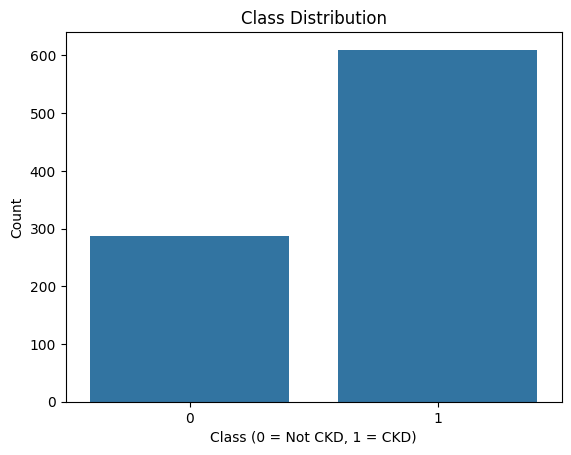

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='class_encoded', data=data)
plt.title("Class Distribution")
plt.xlabel("Class (0 = Not CKD, 1 = CKD)")
plt.ylabel("Count")
plt.show()


In [4]:
counts = data['class_encoded'].value_counts()
ratio = counts.min() / counts.max()
print(f"Minority-to-majority ratio: {ratio:.2f}")


Minority-to-majority ratio: 0.47


In [7]:
%pip install imbalanced-learn

  Using cached imbalanced_learn-0.14.0-py3-none-any.whl.metadata (8.8 kB)
Using cached imbalanced_learn-0.14.0-py3-none-any.whl (239 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced', random_state=42)
from imblearn.over_sampling import SMOTE
X = data.drop(['class_encoded', 'class'], axis=1)
y = data['class_encoded']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("✅ Resampled shape:", X_resampled.shape)



✅ Resampled shape: (1220, 8)


In [6]:
print("Resampled class distribution:")
print(pd.Series(y_resampled).value_counts())

Resampled class distribution:
class_encoded
1    610
0    610
Name: count, dtype: int64


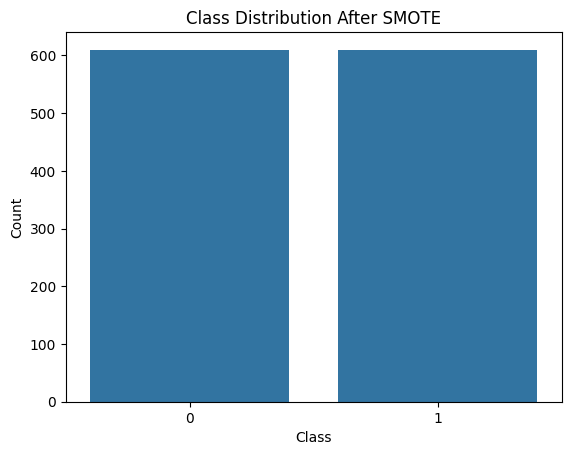

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_resampled)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [8]:
data.shape

(897, 10)

In [9]:
data.to_csv("final.csv", index=False)

In [6]:
import pandas as pd
import numpy as np

xyz = pd.read_csv("practice_ckd.csv")
print(xyz.shape)
xyz['class_encoded'] = xyz['class'].map({'ckd': 1, 'notckd': 0})
xyz.to_csv("practice_ckd.csv", index=False)

(500, 25)
